# Installing required packages

In [1]:
pip install biopython

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.8 MB 1.4 MB/s eta 0:00:03
   - -------------------------------------- 0.1/2.8 MB 2.2 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.8 MB 4.1 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 8.3 MB/s eta 0:00:01
   -------------------------------- ------- 2.3/2.8 MB 13.3 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 14.8 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 12.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install transformers pandas


     ---------------------------------------- 0.0/44.1 kB ? eta -:--:--
     ----------------- -------------------- 20.5/44.1 kB 320.0 kB/s eta 0:00:01
     ----------------------------------- -- 41.0/44.1 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 44.1/44.1 kB 360.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
    --------------------------------------- 0.1/10.0 MB 4.0 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/10.0 MB 12.2 MB/s eta 0:00:01
   --------- ------------------------------ 2.3/10.0 MB 20.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/10.0 MB 25.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.6/10.0 MB 27.0 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/10.0 MB 29.3 MB/s eta 0:00:01
   -------------------------------------- - 9.6/10.0 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------  10.0/10.0 MB 32.1 MB/s eta 0

In [2]:
pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/203.0 MB 871.5 kB/s eta 0:03:53
   ---------------------------------------- 0.2/203.0 MB 1.5 MB/s eta 0:02:17
   ---------------------------------------- 0.3/203.0 MB 1.3 MB/s eta 0:02:36
   ---------------------------------------- 0.4/203.0 MB 2.0 MB/s eta 0:01:41
   ---------------------------------------- 0.9/203.0 MB 3.1 MB/s eta 0:01:06
   ---------------------------------------- 1.5/203.0 MB 4.2 MB/s eta 0:00:48
   ---------------------------------------- 2.0/203.0 MB 5.4 MB/s eta 0:00:38
    --------------------------------------- 3.3/203.0 MB 7.8 MB/s eta 0:00:26
    --------------------------------------- 4.9/203.0 MB 10.1 MB/s eta 0:00:20
   - -------------------------------------- 6.6/203.0 MB 12.4 MB/s eta 0:00:16
   - -------------------------------------- 8.1/203.0 MB 14.8 MB/s eta 0:0

In [7]:
pip install sentence-transformers


   ---------------------------------------- 0.0/268.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/268.8 kB ? eta -:--:--
   - -------------------------------------- 10.2/268.8 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/268.8 kB 330.3 kB/s eta 0:00:01
   ---------- ---------------------------- 71.7/268.8 kB 491.5 kB/s eta 0:00:01
   --------------------------------- ------ 225.3/268.8 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 268.8/268.8 kB 1.2 MB/s eta 0:00:00


In [22]:
pip install rank-bm25 nltk transformers

# Directly fetching Top N relevant articles from PubMed

In [5]:
from Bio import Entrez
import pandas as pd

# Set email
Entrez.email = "ssbidyadhar@utexas.edu"

# Define the query
# query = '"Heart Attack"[Title/Abstract] OR "Myocardial Infarction"[Title/Abstract]'
# query = '"ICU Mortality" AND "Age"'
query = '"ICU Mortality" AND ("Age" OR "Glasgow Coma Scale" OR "GCS" OR "APACHE" OR "BMI" OR "Height" OR "Weight")'
# "Age" OR 

# Search for articles
try:
    handle = Entrez.esearch(db="pubmed", term=query, retmax=50)  # Adjust retmax for more results
    record = Entrez.read(handle)
    ids = record.get("IdList", [])

    # Debugging: Print the entire response
    print("Record:", record)
    
    # Prepare a list to store article details
    articles = []

    if ids:
        for pubmed_id in ids:
            # Fetch details for each PubMed ID
            handle = Entrez.efetch(db="pubmed", id=pubmed_id, rettype="abstract", retmode="text")
            # print(handle.read())
            article_details = handle.read()
            print(f"PubMed ID: {pubmed_id}")
            print(article_details)

            # Extract PubMed ID, and details
            articles.append({"PubMed ID": pubmed_id, "Details": article_details})
    
    # Convert to DataFrame
    df = pd.DataFrame(articles)

    # Save to CSV
    output_file = "pubmed_articles.csv"
    df.to_csv(output_file, index=False)
    print(f"Articles saved to {output_file}")

except Exception as e:
    print(f"Error occurred: {e}")


Record: {'Count': '1849', 'RetMax': '50', 'RetStart': '0', 'IdList': ['39567222', '39544616', '39540730', '39529062', '39507229', '39497221', '39496882', '39482633', '39482088', '39473000', '39452234', '39443937', '39431032', '39408968', '39392586', '39375738', '39366492', '39362971', '39354354', '39326356', '39318959', '39310058', '39301321', '39302432', '39285256', '39278005', '39266274', '39266273', '39261863', '39261816', '39260269', '39257701', '39251097', '39245821', '39238710', '39235491', '39232765', '39224423', '39224081', '39214245', '39192302', '39187535', '39164502', '39163391', '39157528', '39151513', '39139353', '39130418', '39120451', '39113062'], 'TranslationSet': [], 'QueryTranslation': '"ICU Mortality"[All Fields] AND ("Age"[All Fields] OR "Glasgow Coma Scale"[All Fields] OR "GCS"[All Fields] OR "APACHE"[All Fields] OR "BMI"[All Fields] OR "Height"[All Fields] OR "Weight"[All Fields])'}
PubMed ID: 39567222
1. HIV Med. 2024 Nov 20. doi: 10.1111/hiv.13737. Online ahead 

# Fetching top 200 relevant articles from PubMed, computing similarity scores against search query, extracting top 50 ranked articles

In [14]:
from Bio import Entrez
from sentence_transformers import SentenceTransformer, util
import pandas as pd

# Set email for PubMed API
Entrez.email = "ssbidyadhar@utexas.edu"

# Define the base query
base_query = '"ICU Mortality" AND ("Age" OR "Glasgow Coma Scale" OR "GCS" OR "APACHE" OR "BMI" OR "Height" OR "Weight")'

# Load the sentence-transformer model for semantic similarity
# model = SentenceTransformer("allenai/scibert_scivocab_uncased")
# model = SentenceTransformer("gsarti/scibert-nli")
# model = SentenceTransformer("pritamdeka/BioBERT-mnli-snli-scinli-scitail-mednli-stsb")
model = SentenceTransformer("allenai-specter")

# Search for articles using PubMed
try:
    # Retrieve a larger pool of articles for better ranking
    handle = Entrez.esearch(db="pubmed", term=base_query, retmax=200)  # Adjust retmax as needed
    record = Entrez.read(handle)
    ids = record.get("IdList", [])

    # Debugging: Print the entire response
    print(f"Number of articles retrieved: {len(ids)}")
    
    # Prepare a list to store article details
    articles = []

    if ids:
        for pubmed_id in ids:
            try:
                # Fetch details for each PubMed ID
                handle = Entrez.efetch(db="pubmed", id=pubmed_id, rettype="abstract", retmode="text")
                abstract = handle.read().strip()
                print(f"PubMed ID: {pubmed_id}, Abstract retrieved.")

                # Skip empty abstracts
                if not abstract:
                    continue

                # Store article details
                articles.append({"PubMed ID": pubmed_id, "Abstract": abstract})
            except Exception as e:
                print(f"Error fetching PubMed ID {pubmed_id}: {e}")

    # Check if articles were retrieved
    if not articles:
        print("No valid articles retrieved.")
        exit()

    # Embed the query and calculate similarity with each abstract
    query_embedding = model.encode(base_query, convert_to_tensor=True)

    for article in articles:
        try:
            # Embed the abstract
            abstract_embedding = model.encode(article["Abstract"], convert_to_tensor=True)
            
            # Compute similarity score
            similarity = util.cos_sim(query_embedding, abstract_embedding).item()
            article["Similarity"] = similarity
        except Exception as e:
            print(f"Error calculating similarity for PubMed ID {article['PubMed ID']}: {e}")
            article["Similarity"] = 0  # Assign a default similarity score for problematic cases

    # Preserve the full list of articles
    all_articles = articles.copy()  # Keep all 200 articles

    # Sort articles by similarity score
    articles = sorted(articles, key=lambda x: x["Similarity"], reverse=True)

    # Select top 50 most relevant articles
    top_articles = articles[:50]

    # Convert to DataFrame
    df = pd.DataFrame(top_articles)

    # Save to CSV
    output_file = "top_semantic_pubmed_articles.csv"
    df.to_csv(output_file, index=False)
    print(f"Top similar articles saved to {output_file}")

except Exception as e:
    print(f"Error occurred: {e}")


Number of articles retrieved: 200
PubMed ID: 39567222, Abstract retrieved.
PubMed ID: 39544616, Abstract retrieved.
PubMed ID: 39540730, Abstract retrieved.
PubMed ID: 39529062, Abstract retrieved.
PubMed ID: 39507229, Abstract retrieved.
PubMed ID: 39497221, Abstract retrieved.
PubMed ID: 39496882, Abstract retrieved.
PubMed ID: 39482633, Abstract retrieved.
PubMed ID: 39482088, Abstract retrieved.
PubMed ID: 39473000, Abstract retrieved.
PubMed ID: 39452234, Abstract retrieved.
PubMed ID: 39443937, Abstract retrieved.
PubMed ID: 39431032, Abstract retrieved.
PubMed ID: 39408968, Abstract retrieved.
PubMed ID: 39392586, Abstract retrieved.
PubMed ID: 39375738, Abstract retrieved.
PubMed ID: 39366492, Abstract retrieved.
PubMed ID: 39362971, Abstract retrieved.
PubMed ID: 39354354, Abstract retrieved.
PubMed ID: 39326356, Abstract retrieved.
PubMed ID: 39318959, Abstract retrieved.
PubMed ID: 39310058, Abstract retrieved.
PubMed ID: 39301321, Abstract retrieved.
PubMed ID: 39302432, Ab

# Plotting distribution of similarity scores for retrieved articles

In [19]:
print(f"Total articles: {len(all_articles)}")
# all_articles[:5]

Total articles: 200


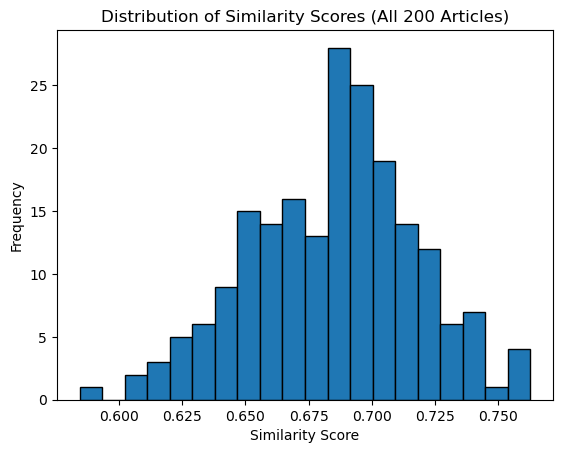

In [20]:
import matplotlib.pyplot as plt

# Extract similarity scores from all_articles (list of dictionaries)
scores = [article['Similarity'] for article in all_articles if 'Similarity' in article]

# Plot histogram
plt.hist(scores, bins=20, edgecolor='black')
plt.title("Distribution of Similarity Scores (All 200 Articles)")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


# Summarizing articles using a Hugging Face model (facebook/bart-large-cnn)

In [21]:
from transformers import pipeline, AutoTokenizer
import pandas as pd

# Load the summarization pipeline and tokenizer
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

# Load the previously saved CSV with PubMed results
#input_file = "pubmed_articles.csv"
input_file = "top_semantic_pubmed_articles.csv"
articles = pd.read_csv(input_file)

# Prepare a list to store summarized results
summarized_articles = []

# Token limit for the model
max_tokens = 1024

# Summarize each article's details (abstract)
for _, row in articles.iterrows():
    try:
        # original_text = row["Details"].strip()
        original_text = row["Abstract"].strip()
        
        # Skip empty or very short texts
        if len(original_text) == 0 or len(original_text) < 50:
            summarized_text = "Abstract too short or empty to summarize."
        else:
            # Truncate text based on token limit
            inputs = tokenizer(original_text, return_tensors="pt", truncation=True, max_length=max_tokens)
            truncated_text = tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True)

            # Generate summary
            summary = summarizer(truncated_text, max_length=150, min_length=30, do_sample=False)
            summarized_text = summary[0]['summary_text']
        
        # Add to the summarized list
        summarized_articles.append({
            "PubMed ID": row["PubMed ID"],
            "Original Details": original_text,
            "Summarized Details": summarized_text
        })
    except Exception as e:
        print(f"Error summarizing article {row['PubMed ID']} - {e}. Text length: {len(original_text)}")
        summarized_articles.append({
            "PubMed ID": row["PubMed ID"],
            "Original Details": original_text,
            "Summarized Details": "Error summarizing this abstract due to processing limitations."
        })

# Convert the summarized articles to a DataFrame
summarized_df = pd.DataFrame(summarized_articles)

# Save the summarized articles to a new CSV
output_file = "summarized_pubmed_articles.csv"
summarized_df.to_csv(output_file, index=False)
print(f"Summarized articles saved to {output_file}")


Summarized articles saved to summarized_pubmed_articles.csv


# Summarizing articles by first extracting most relevant sentences and then passing them to BART

In [5]:
import warnings
import pandas as pd
from rank_bm25 import BM25Okapi
from nltk.tokenize import sent_tokenize, word_tokenize
from transformers import pipeline

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the summarization model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Load the top 50 PubMed articles from CSV
input_file = "top_semantic_pubmed_articles.csv"
articles_df = pd.read_csv(input_file)

# Define query terms
query_terms = ["ICU Mortality", "Age", "Glasgow Coma Scale", "APACHE Score", "BMI", "Height", "Weight"]

# Prepare a list to store the hybrid summaries
hybrid_summaries = []

# Loop through each article
for _, row in articles_df.iterrows():
    abstract = row["Abstract"]
    pubmed_id = row["PubMed ID"]

    # Tokenize abstract into sentences
    sentences = sent_tokenize(abstract)
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

    # Use BM25 to rank sentences by relevance to the query
    bm25 = BM25Okapi(tokenized_sentences)
    query_tokenized = word_tokenize(" ".join(query_terms))
    scores = bm25.get_scores(query_tokenized)

    # Select the top 3 most relevant sentences
    top_sentences = [sentences[i] for i in sorted(range(len(scores)), key=lambda x: scores[x], reverse=True)[:3]]
    top_sentences_text = " ".join(top_sentences)

    # Summarize the selected sentences without max_length
    try:
        summary = summarizer(top_sentences_text, do_sample=False)  # No max_length or min_length
        summarized_text = summary[0]["summary_text"]
    except Exception as e:
        print(f"Error summarizing PubMed ID {pubmed_id}: {e}")
        summarized_text = "Error generating summary."

    # Store the results
    hybrid_summaries.append({
        "PubMed ID": pubmed_id,
        "Extracted Sentences": top_sentences_text,
        "Summarized Text": summarized_text
    })

# Convert results to a DataFrame
hybrid_summaries_df = pd.DataFrame(hybrid_summaries)

# Save to CSV for comparison
output_file = "hybrid_summarized_pubmed_articles.csv"
hybrid_summaries_df.to_csv(output_file, index=False)
print(f"Hybrid summaries saved to {output_file}")


Your max_length is set to 142, but your input_length is only 82. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=41)
Your max_length is set to 142, but your input_length is only 104. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=52)
Your max_length is set to 142, but your input_length is only 103. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=51)
Your max_length is set to 142, but your input_length is only 53. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=26)
Yo

Hybrid summaries saved to hybrid_summarized_pubmed_articles.csv
